In [1]:
# get the absolute path of the TB module.
import os
import sys
curent_path = os.getcwd()
module_path = curent_path[:-9]
sys.path.append(module_path)

In [2]:
from tbee.lattice import *
from tbee.system import *
from tbee.plot import *
from tbee.save import *
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Dimer Chain

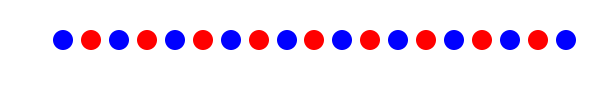

In [5]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}, 
             {'tag': b'b', 'r0': (1, 0)}]
prim_vec = [(2., 0.)]

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

n1 = 10
lat.get_lattice(n1=n1)
lat.remove_sites([2*n1-1])
fig_lat = plt.lattice(ms=20, figsize=(10, 2))

In [6]:
sys.print_distances(n=3)


18 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [ 0.]
2nd hopping, length: 2.000
	with positive angles:
	 [ 0.]
3rd hopping, length: 3.000
	with positive angles:
	 [ 0.]


In [7]:
e_a, e_b = 0j, -1j
t_ab, t_ba = 2., 1.

In [8]:
sys.set_onsite({b'a': e_a, b'b': e_b})

In [9]:
sys.set_hopping([{'n': 1, 'tag': b'ab', 't': t_ab}, 
                 {'n': 1, 'tag': b'ba', 't': t_ba}])

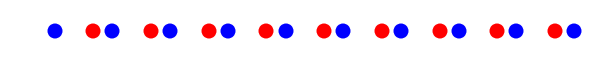

In [10]:
sys.get_coor_hop()
plt.lattice_hop(ms=15, figsize=(10, 2));

In [11]:
list_hop = [{'n': 1, 'tag': b'ab', 't': t_ba}, 
            {'n': 1, 'tag': b'ba', 't': t_ab}]
sys.change_hopping_square(list_hop=list_hop, 
                          xlims=[10., 20.])

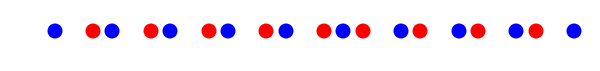

In [12]:
sys.get_coor_hop()
plt.lattice_hop(ms=15, figsize=(10, 2));

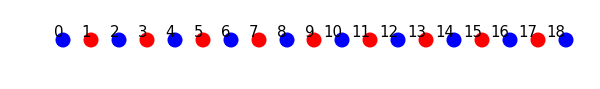

In [13]:
fig_lat = plt.lattice(ms=15, figsize=(10, 2), fs=15, plt_index=True)

In [14]:
sys.set_onsite_def({9: -2j, 10: 2j, 11: -2j})

In [15]:
sys.set_hopping_def({(8, 9): 3., (11, 12): 3.})

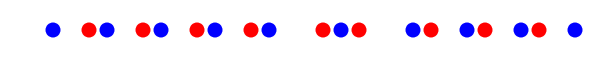

In [16]:
sys.get_coor_hop()
plt.lattice_hop(ms=15, figsize=(10, 2));

In [17]:
sys.set_onsite_dis(alpha=0.2+0.2j)

In [18]:
sys.set_hopping_dis(alpha=0.5+0.1j)

In [19]:
sys.get_coor_hop()

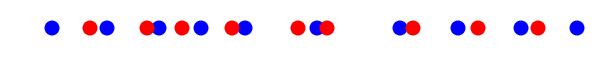

In [20]:
plt.lattice_hop(ms=15, figsize=(10, 2));

In [21]:
sys.get_ham()

In [22]:
sys.get_eig(eigenvec=True)

In [23]:
zero_mode = sys.get_intensity_pola_max(tag_pola=b'a')

State with polarization: 0.98139


In [24]:
intensity_neg = sys.get_intensity_en(lims=[-3, -1e-3])

6 states between -3 and -0.001


In [25]:
sys.get_ipr()

In [26]:
plt = plot(sys=sys)

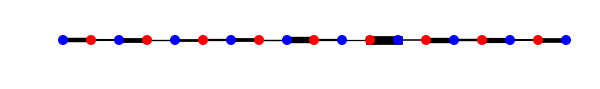

In [27]:
plt.lattice(ms=10, c=2, plt_hop=True, figsize=(10, 2));

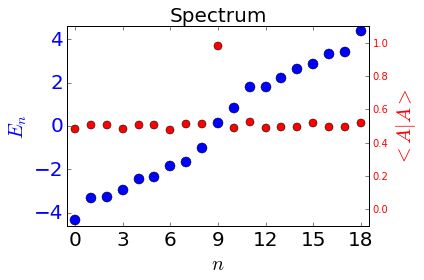

In [28]:
plt.spectrum(tag_pola=b'a');

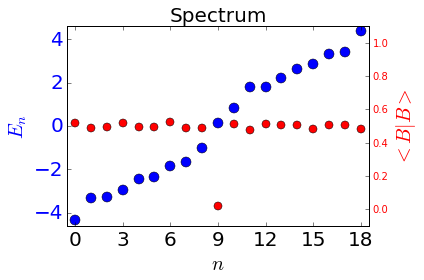

In [29]:
plt.spectrum(tag_pola=b'b');

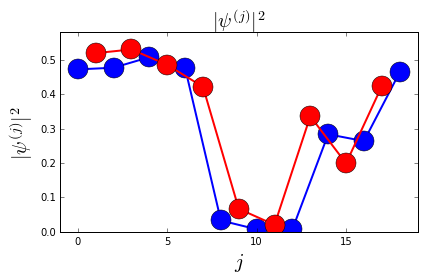

In [30]:
plt.intensity_1d(intensity_neg);

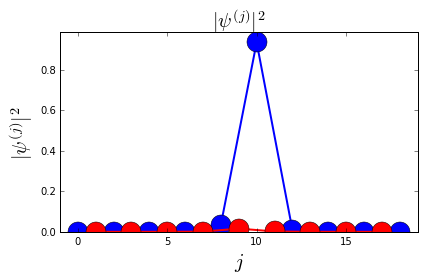

In [31]:
plt.intensity_1d(zero_mode);

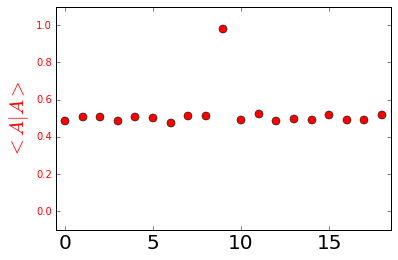

In [32]:
plt.polarization(tag_pola=b'a');

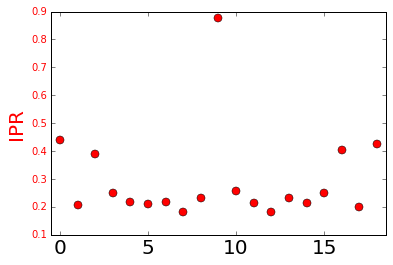

In [33]:
sys.get_ipr()
plt.ipr();

## Chain of CROWs
### (non-Hermitian real Hamiltonian)

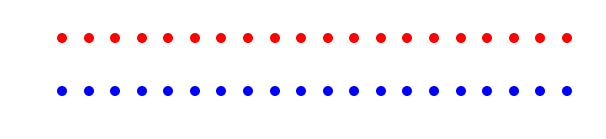

In [34]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}, 
             {'tag': b'b', 'r0': (0, 2)}]
prim_vec = [(1., 0.)]

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)
sav = save(dir_name='crows')

n1, n2 = 20, 1
lat.get_lattice(n1=n1, n2=n2)
fig_lat = lat.plot(ms=10, figsize=(10, 7))
sav.fig_lat(fig_lat, 'lattice')

In [35]:
sys.print_distances(n=3)


38 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [ 0.]
2nd hopping, length: 2.000
	with positive angles:
	 [  0.  90.]
3rd hopping, length: 2.236
	with positive angles:
	 [  63.4349  116.5651]


In [36]:
A, B, W = 4., 0., 1.
sys.clear_hopping()

In [37]:
sys.set_hopping([{'n': 2, 'ang': 90, 't': A}, 
                 {'n': 3, 't': W}])

### Upper part Hamiltonian hoppings

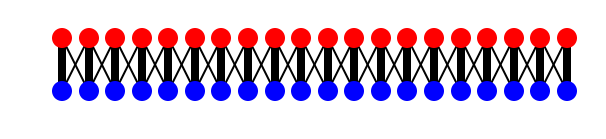

In [38]:
plt.lattice(plt_hop=True, c=2, figsize=(10, 2));

In [39]:
sys.set_hopping([{'n': 2, 'ang': -90, 't': B}, 
                 {'n': 3, 't': W}], upper_part=False)

### Lower part Hamiltonian hoppings

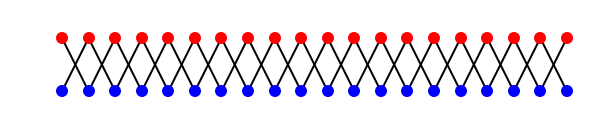

In [40]:
plt.lattice(ms=12, plt_hop_low=True, c=2, figsize=(10, 2));

In [41]:
sys.get_ham()

In [42]:
sys.get_eig()

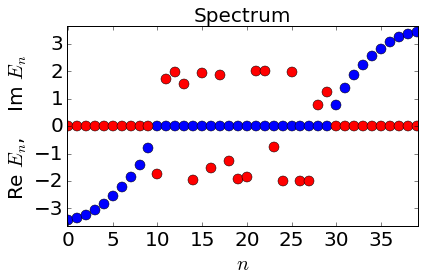

In [43]:
fig_spec = plt.spectrum_complex();

## Dimerization defect

In [44]:
sys.change_hopping_square([{'n': 2, 'ang': 90, 't': B}], 
                           xlims=[10, 20], ylims=[0, 2])
sys.change_hopping_square([{'n': 2, 'ang': -90, 't': A}], 
                           xlims=[10, 20], ylims=[0, 2])

### Upper part Hamiltonian hoppings

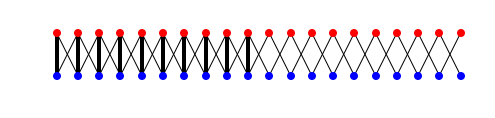

In [45]:
plt.lattice(plt_hop=True, ms=8, c=1, figsize=(8, 6));

### Lower part Hamiltonian hoppings

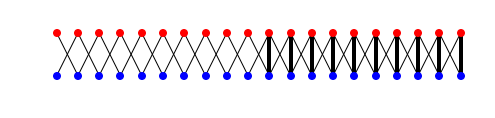

In [46]:
plt.lattice(plt_hop_low=True, ms=8, c=1, figsize=(8, 6));

In [47]:
sys.get_ham()

In [48]:
sys.get_eig(eigenvec=True, left=True)

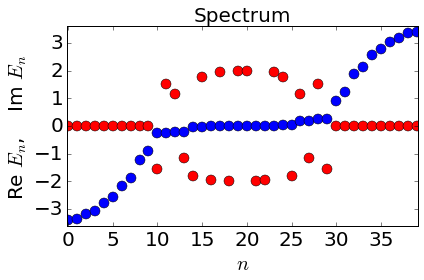

In [49]:
fig_spec_dim_def = plt.spectrum_complex();

In [50]:
sav.fig(fig_spec_dim_def, 'spec_dim_def')

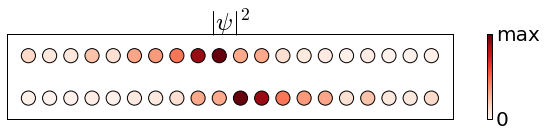

In [51]:
plt.intensity_disk(sys.intensity[:, 10], figsize=(10, 2));

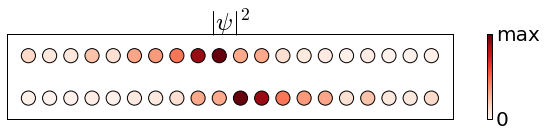

In [52]:
plt.intensity_disk(sys.intensity[:, 11], figsize=(10, 2));

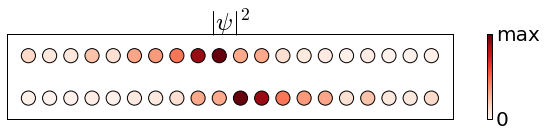

In [53]:
plt.intensity_disk(sys.intensity[:, 28], figsize=(10, 2));

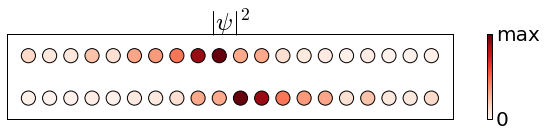

In [54]:
plt.intensity_disk(sys.intensity[:, 29], figsize=(10, 2));

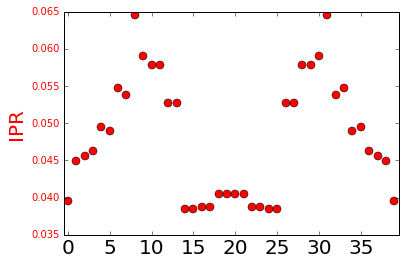

In [55]:
sys.get_ipr()
plt.ipr();

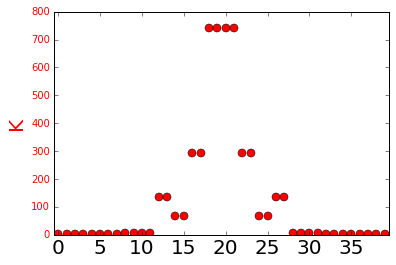

In [56]:
sys.get_petermann()
plt.petermann();

## Square Lattice

### nearest neighbour hoppings

In [57]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}]
prim_vec = [(1., 0.), (0., 1.)]
lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

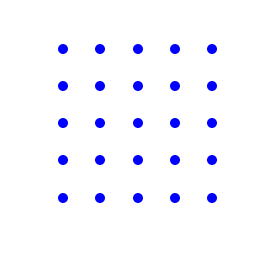

In [58]:
lat.get_lattice(n1=5, n2=5)
plt.lattice(ms=10);

In [59]:
sys.clear_hopping()
sys.set_hopping([{'n': 1, 't': 1.}])

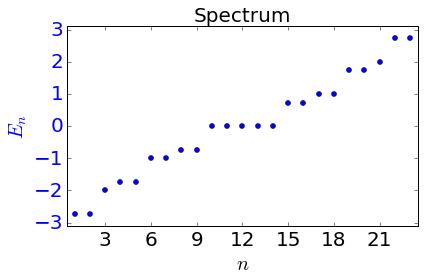

In [60]:
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.spectrum(ms=5, lims=[-3, 3]);

5 states between -1e-05 and 1e-05


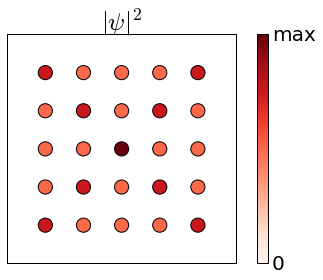

In [61]:
zero_modes = sys.get_intensity_en(lims=[-1e-5, 1e-5])
plt.intensity_disk(zero_modes, s=200);

### + next nearest neighbour hoppings

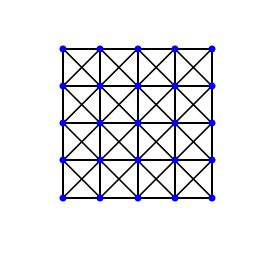

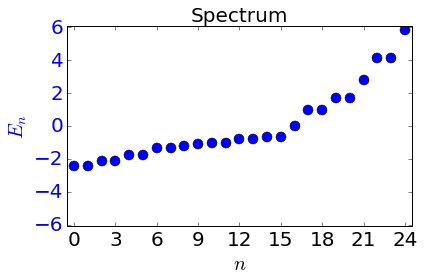

In [62]:
sys.set_hopping([{'n': 2, 't': 0.8}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
sav = save(dir_name='square')
plt.lattice(plt_hop=True, ms=7, c=2);
plt.spectrum();

1 states between -0.001 and 0.001


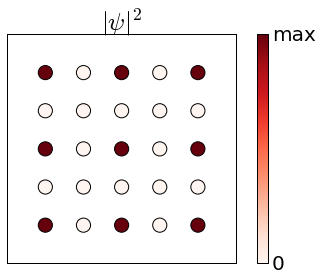

In [63]:
zero_mode = sys.get_intensity_en(lims=[-1e-3, 1e-3])
plt.intensity_disk(zero_mode, s=200);

### + next-next nearest neighbour hoppings

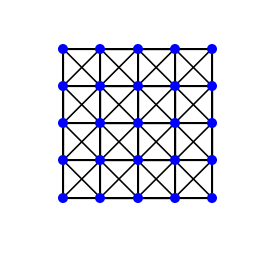

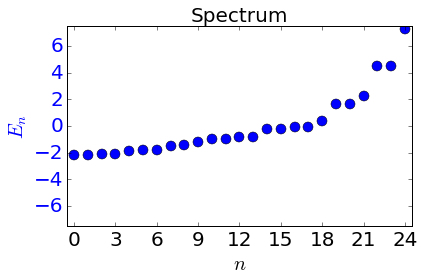

In [64]:
sys.set_hopping([{'n': 3, 't': 0.6}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
plt.lattice(plt_hop=True, ms=10, c=2);
plt.spectrum();

In [65]:
zero_mode = sys.get_intensity_en(lims=[-1e-3, 1e-3])

0 states between -0.001 and 0.001


### + next-next-next nearest neighbour hoppings

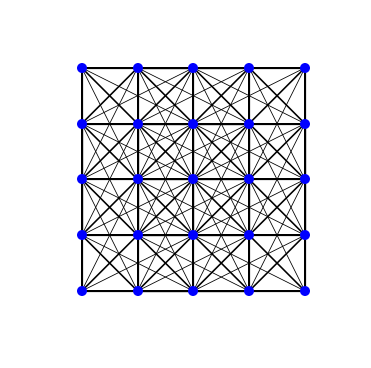

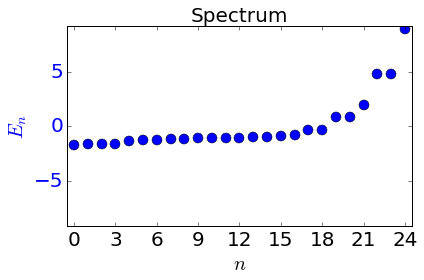

In [66]:
sys.set_hopping([{'n': 4, 't': 0.4}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
plt.lattice(plt_hop=True, c=2., ms=10, figsize=(6, 6));
plt.spectrum();

In [67]:
zero_mode = sys.get_intensity_en(lims=[-1e-3, 1e-3])

0 states between -0.001 and 0.001


### Twelve First hopping types 

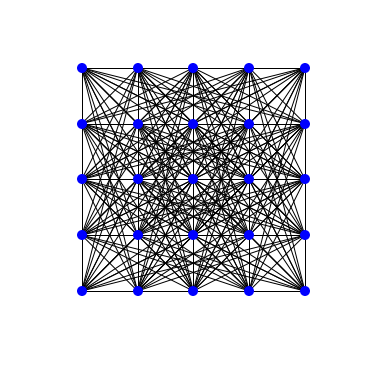

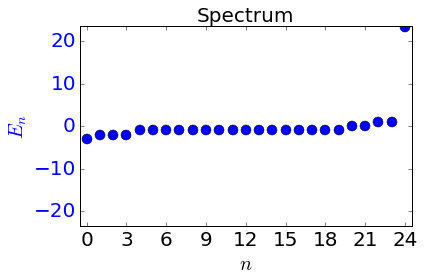

In [68]:
sys.set_hopping([{'n': 1, 't': 1.}, {'n': 2, 't': 1.},
                 {'n': 3, 't': 1.}, {'n': 4, 't': 1.},
                 {'n': 5, 't': 1.}, {'n': 6, 't': 1.},
                 {'n': 7, 't': 1.}, {'n': 8, 't': 1.},
                 {'n': 9, 't': 1.}, {'n': 10, 't': 1.},
                 {'n': 11, 't': 1.}, {'n': 12, 't': 1.}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
lat_12n = plt.lattice(plt_hop=True, c=1., ms=10, figsize=(6, 6));
plt.spectrum();
sav.fig(lat_12n, 'lat_1-12hop')

1 states between 20 and 25


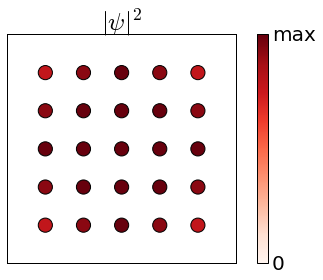

In [69]:
zero_mode = sys.get_intensity_en(lims=[20, 25])
plt.intensity_disk(zero_mode, s=200);

### Square Lattice with Chaotic Shape

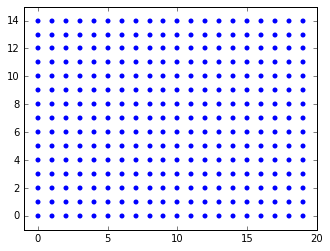

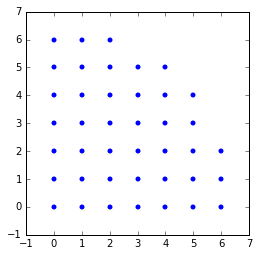

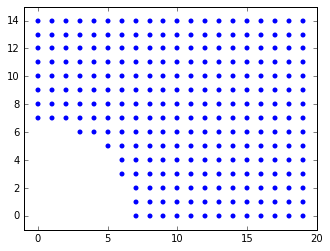

In [70]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}]
prim_vec = [(1., 0.), (0., 1.)]
lat1 = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys1 = system(lat=lat1)
plt1 = plot(sys=sys1)
sav = save(dir_name='sinai')

lat1.get_lattice(n1=20, n2=15)
plt1.lattice(ms=5, axis=True);

lat2 = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys2 = system(lat=lat2)
plt2 = plot(sys=sys2)

lat2.get_lattice(n1=7, n2=7)
lat2.ellipse_in(rx=6.5, ry=6.5, x0=0., y0=0.)
plt2.lattice(ms=5, axis=True);

lat = lat1 - lat2
sys = system(lat=lat)
plt = plot(sys=sys)
plt.lattice(ms=5, axis=True);


In [71]:
sys.set_hopping([{'n': 1, 't': 1.}])
sys.get_ham()
sys.get_eig(eigenvec=True)

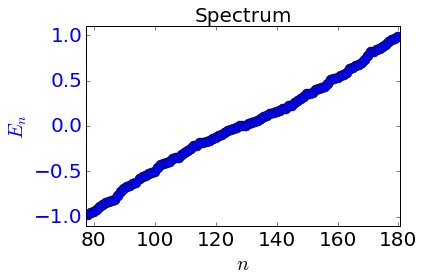

In [72]:
plt.spectrum(lims=[-1, 1]);

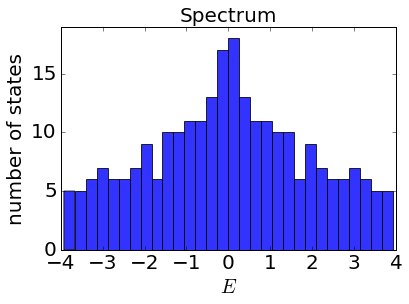

In [73]:
plt.spectrum_hist(nbr_bins=30)

In [74]:
flat_band = sys.get_intensity_en(lims=[-.001, .001])

3 states between -0.001 and 0.001


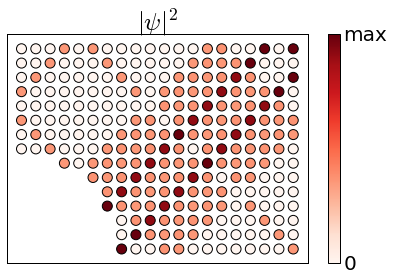

In [75]:
fig_zero_en = plt.intensity_disk(flat_band, s=100);

In [76]:
sav.fig(fig_zero_en, 'zero_en')

### Lieb Lattice

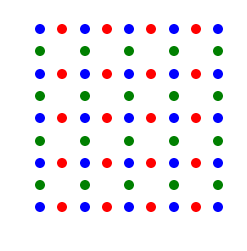

In [77]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)},
             {'tag': b'b', 'r0': (1, 0)},
             {'tag': b'c', 'r0': (0, 1)}]
prim_vec = [(2., 0.), (0., 2.)]
lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

n1, n2 = 5, 5
lat.get_lattice(n1=n1, n2=n2)
lat.remove_dangling()
plt.lattice(ms=10);

In [78]:
sys.print_distances(n=2)


41 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [  0.  90.]
2nd hopping, length: 1.414
	with positive angles:
	 [  45.  135.]


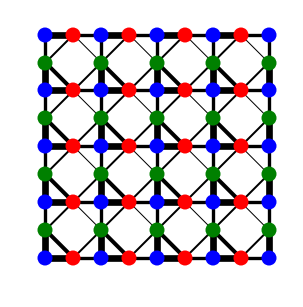

In [79]:
t_ab, t_ba = 4/3., 2/3.
t_ac, t_ca = 4/3., 2/3.
sys.set_hopping([{'n': 1, 'tag': b'ab', 't': t_ab},
                 {'n': 1, 'tag': b'ba', 't': t_ba},
                 {'n': 1, 'tag': b'ac', 't': t_ac},
                 {'n': 1, 'tag': b'ca', 't': t_ca}])
t_mp, t_pp, t_mm, t_pm = 0.8, 0.4, 0.4, 0.2
sys.set_hopping([{'n': 2, 'ang': 45, 'tag': b'bc', 't': t_pp},
                 {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_mp},
                 {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_pm},
                 {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_mm}])
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

### Dimerization defect along x

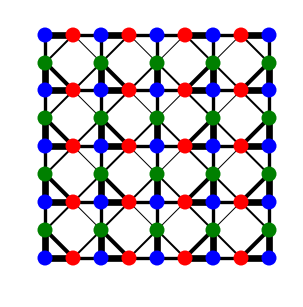

In [80]:
list_hop = [{'n': 1, 'tag': b'ab', 't': t_ba},
            {'n': 1, 'tag': b'ba', 't': t_ab},
            {'n': 2, 'ang': 45, 'tag': b'bc', 't': t_mp},
            {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_pp},
            {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_mm},
            {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_pm}]
sys.change_hopping_square(list_hop=list_hop, 
                          xlims=[4., 8.], 
                          ylims=[0., 8.])
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

### Dimerization defect along y

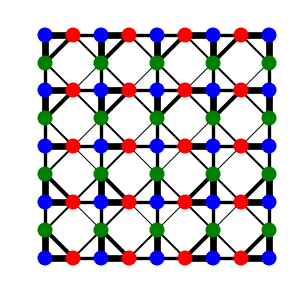

In [81]:
list_hop = [{'n': 1, 'tag': b'ac', 't': t_ca},
            {'n': 1, 'tag': b'ca', 't': t_ac},
            {'n': 2, 'ang': 45, 'tag': b'bc', 't': t_pm},
            {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_mm},
            {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_pp},
            {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_mp}]
sys.change_hopping_square(list_hop=list_hop,
                   xlims=[0., 8.], 
                   ylims=[4., 8.])
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

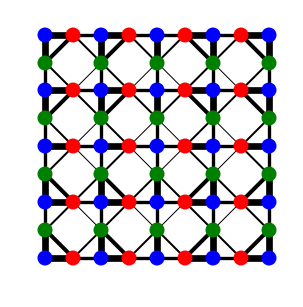

In [82]:
list_hop = [{'n': 2, 'ang': 45, 'tag': b'bc', 't': t_pp},
            {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_pm},
            {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_mp},
            {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_pp}]
sys.change_hopping_square(list_hop=list_hop,
                   xlims=[4., 8.], 
                   ylims=[4., 8.])
lat_cross_def = plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

In [83]:
sav = save(dir_name='lieb')
sav.fig(lat_cross_def, 'lat_cross_def')

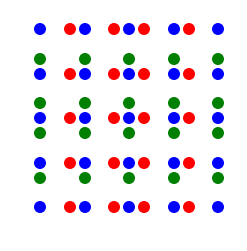

In [84]:
sys.get_coor_hop()
plt.lattice_hop(ms=12);

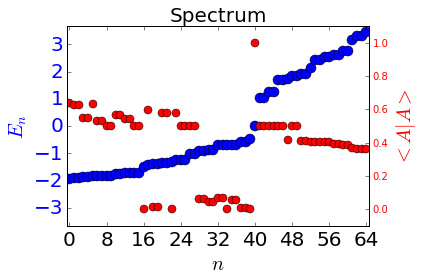

In [85]:
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.spectrum(tag_pola=b'a');

State with polarization: 1.00000


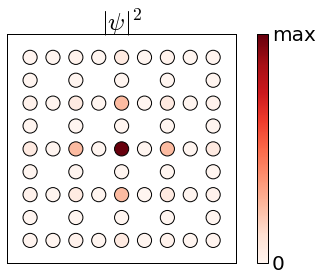

In [86]:
zero_mode = sys.get_intensity_pola_max(tag_pola=b'a')
plt.intensity_disk(zero_mode);

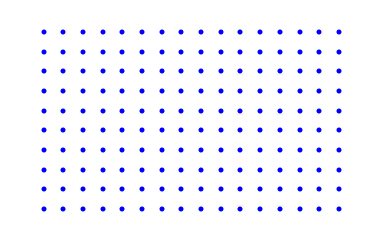

In [87]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}]
prim_vec = [(1., 0.), (0., 1.)]
lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

lat.get_lattice(n1=16, n2=10)
plt.lattice(ms=5);

In [88]:
list_hop = [{'n': 1, 't': 1.}]
sys.set_hopping(list_hop=list_hop)

In [89]:
list_hop = [{'n': 1, 't': 2}]
sys.change_hopping_ellipse(list_hop=list_hop,
                          rx=5., ry=3.,
                          x0=7.5, y0=4.5)

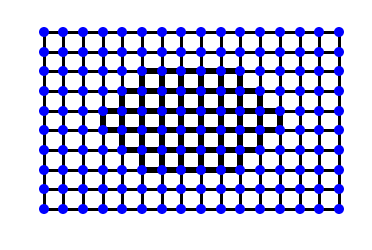

In [90]:
plt.lattice(plt_hop=True, c=3, ms=10);

In [91]:
sys.get_ham()

In [92]:
sys.get_eig(eigenvec=True)

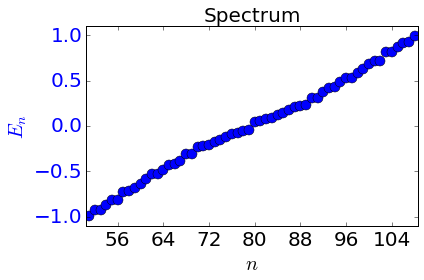

In [93]:
plt.spectrum(lims=[-1., 1.]);

## Graphene

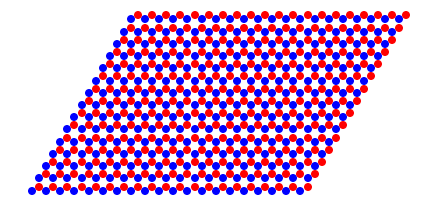

In [94]:
from math import sqrt
unit_cell = [{'tag': b'a', 'r0': (0., 0.)}, 
             {'tag': b'b', 'r0': (0.5*sqrt(3), 0.5)}]
prim_vec = [(sqrt(3), 0.), 
            (cos(PI/3)*sqrt(3), sin(PI/3)*sqrt(3))]

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)
sav = save(dir_name='graphene')

n1, n2 = 20, 15
lat.get_lattice(n1=n1, n2=n2)
fig_lat_ind = plt.lattice(ms=8, fs=15, figsize=(7, 4))
sav.fig_lat(fig_lat_ind, 'lattice_n'+str(lat.sites))

In [95]:
sys.print_distances(n=1)


484 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [  30.   90.  150.]


In [96]:
sys.set_hopping([{'n': 1, 'ang': 30, 't': 1.},
                 {'n': 1, 'ang': 150, 't': 1.},
                 {'n': 1, 'ang': 90, 't': 1.}])

In [97]:
sys.get_coor_hop();

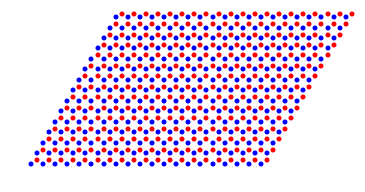

In [98]:
plt.lattice_hop(ms=5);

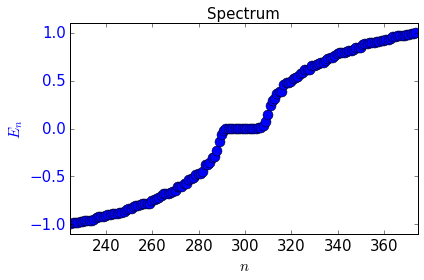

In [99]:
sys.get_ham()
sys.get_eig()
plt.spectrum(fs=15, lims=[-1., 1.]);

In [100]:
sys.set_hopping([{'n': 1, 'ang': 30, 't': 1.},
                 {'n': 1, 'ang': 150, 't': 1.},
                 {'n': 1, 'ang': 90, 't': 2.}])

In [101]:
sys.get_coor_hop();

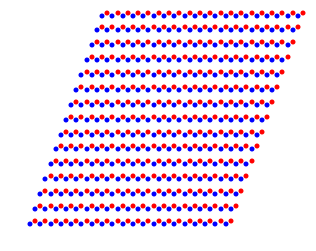

In [102]:
plt.lattice_hop(ms=5);

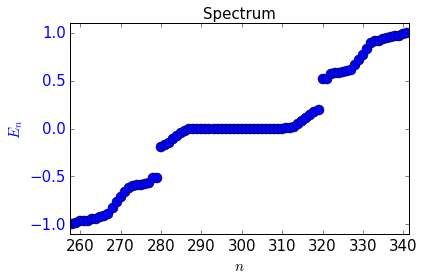

In [103]:
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.spectrum(fs=15, lims=[-1., 1.]);

In [104]:
flat_band = sys.get_intensity_en(lims=[-0.5, 0.5])

40 states between -0.5 and 0.5


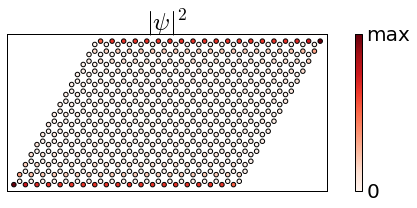

In [105]:
plt.intensity_disk(flat_band, s=20, figsize=(8, 3));

## Square Lattice with an 2-level impurity 

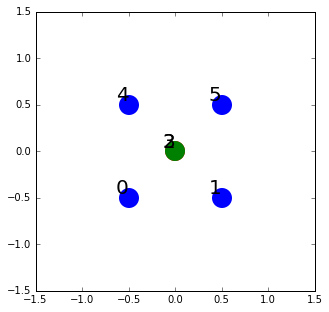

In [106]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}]
prim_vec = [(1., 0.), (0., 1.)]
lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)
lat.get_lattice(n1=2, n2=2)
lat.center()
sites_no_impurity = lat.sites
coor = np.array([(0, 0, b'b'), (0, 0, b'c')], dtype=[('x', 'f8'), ('y', 'f8'), ('tag', 'S1')])
lat.add_sites(coor=coor)
lat.plot(axis=True, plt_index=True);

In [107]:
# Energies of the 2 levels
sys.set_onsite({b'b': 1, b'c': 2})

In [108]:
sys.print_distances(2)


3 different distances between sites:

Distances between sites:
1st hopping, length: 0.707
	with positive angles:
	 [  45.  135.]
2nd hopping, length: 1.000
	with positive angles:
	 [  0.  90.]


In [109]:
# set the hoppings of the regular lattice (n=2)
sys.set_hopping([{'n': 2, 't': 1.}])

In [110]:
t0 = .8
# set the hoppings of the regular lattice / impurity ground state
sys.set_hopping([{'n': 1, 't': t0, 'tag': b'ab'}, 
                 {'n': 1, 't': t0, 'tag': b'ba'}])  
t1 = .6
# set the hoppings of the regular lattice / impurity excited state
sys.set_hopping([{'n': 1, 't': t1, 'tag': b'ac'}, 
                 {'n': 1, 't': t1, 'tag': b'ca'}])  

In [111]:
sys.get_ham()
print(sys.ham.real.toarray())
sys.get_eig(eigenvec=True)

[[ 0.   1.   0.8  0.6  1.   0. ]
 [ 1.   0.   0.8  0.6  0.   1. ]
 [ 0.8  0.8  1.   0.   0.8  0.8]
 [ 0.6  0.6  0.   2.   0.6  0.6]
 [ 1.   0.   0.8  0.6  0.   1. ]
 [ 0.   1.   0.8  0.6  1.   0. ]]


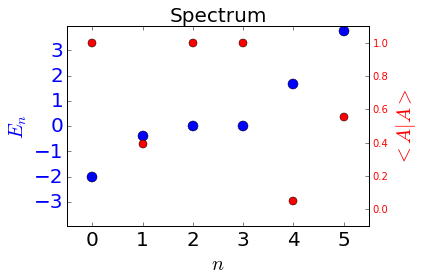

In [112]:
plt.spectrum(tag_pola=b'a');